# Example. Usage of Bohman's Methods

Let's look, how Bohman's method produce 

In [1]:
import cfinversion

In [15]:
from cfinversion.continuous import *
def BohmanMethodTest(x, cf, ax = None, methods = ['A', 'B', 'C', 'D', 'E'], N = 1000, delta=1e-1):
  bohman = {
            'A' : BohmanA(N=N,delta=delta),
            'B' : BohmanB(N=N,delta=delta),
            'C' : BohmanC(N=N,delta=delta),
            'D' : BohmanD(N=N,delta=delta), 
            'E' : BohmanE(N=N,delta=delta)
            }
  
  for method in methods:
    bohman[method].fit(cf)
    ax.plot(x, bohman[method].cdf(x), label = f"Method {method}")
  return ax, bohman

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from cfinversion.distributions import Uniform, UniformSquared

## Smooth densities
1. Normal distribution
2. Laplace distribution
3. Cauchy distribution

## Distributions with discontinuous and singular densities
1. Uniform distribution
2. Uniform squared-distribution

In [16]:
a = np.sqrt(15 / 7)
dist = UniformSquared(-a, a)

In [12]:
a = 2
dist = Uniform(-a/2 + 1, a/2 + 1)

In [17]:
from cfinversion.tools import lre

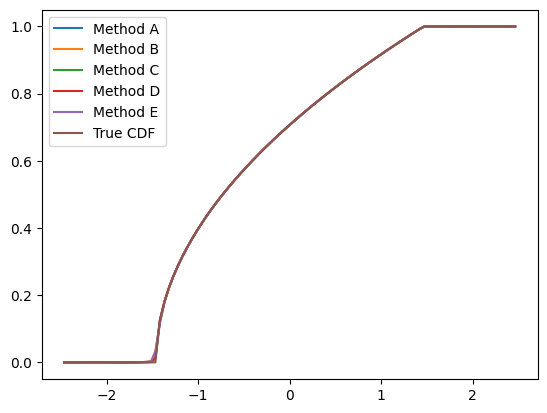

In [18]:
fig, ax = plt.subplots()
x = np.linspace(-a-1, a+1, 100)
ax, res = BohmanMethodTest(x, dist.chr, ax)
ax.plot(x, dist.cdf(x), label = "True CDF")
ax.legend()

# Bonus: discrete case

In [19]:
import scipy as sc
cf_ = lambda t: np.exp(10*(np.exp(1j*t) - 1))
cf = np.vectorize(cf_)
cdf_ = lambda x: 0.5 -\
  sc.integrate.quad(lambda t: np.real(cf(t)*np.exp(-1j*t*x) / (2 * np.pi * (1 - np.exp(-1j*t)))), -np.pi, np.pi, points = [0.0], epsabs = 0.0001)[0]
cdf = np.vectorize(cdf_)

In [23]:
x = np.linspace(-5, 20, 1001)
y = cdf(x)

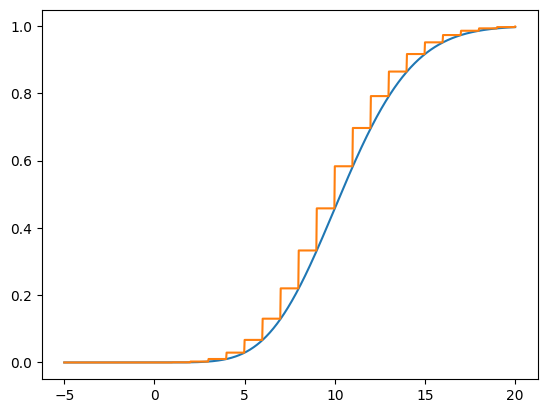

In [24]:
plt.plot(x, y)
plt.plot(x, sc.stats.poisson.cdf(x, mu = 10))

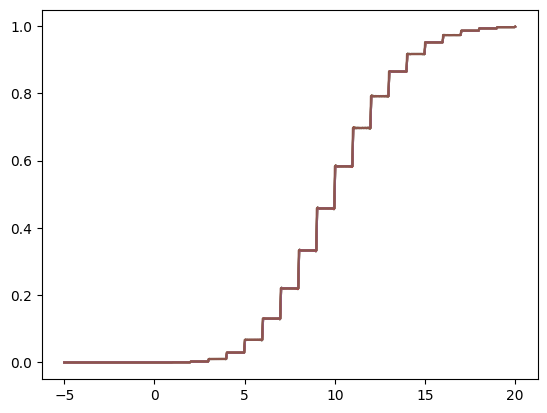

In [25]:
fig, ax = plt.subplots()
BohmanMethodTest(x, cf, ax, N = 10000)
ax.plot(x, sc.stats.poisson.cdf(x, mu = 10))